# Multilayer perceptron for images classification
### Ilya Tsuprun KA-14mp

# IMPORTS

In [1]:
import os
import cv2
import time
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.datasets import mnist

num_classes = 10

lr = 0.001
epochs = 10

# Load data. Prepare data for training. Split the data into train and test sets.

Two datasets will be used:
-  MNIST Dataset ( grayscale images with numbers classification per 10 classes )
-  Animal faces ( rgb animal faces images classification per 3 classes )
link: https://www.kaggle.com/datasets/andrewmvd/animal-faces

# MNIST dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f'train images shape: {x_train.shape}')
print(f'train labels shape: {y_train.shape}')
print(f'test images shape: {x_test.shape}')
print(f'test labels shape: {y_test.shape}')

train images shape: (60000, 28, 28)
train labels shape: (60000,)
test images shape: (10000, 28, 28)
test labels shape: (10000,)


label:  0


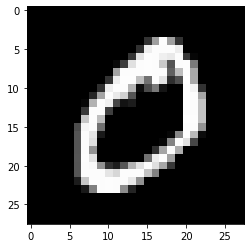

In [3]:
print('label: ', y_train[1])
image = x_train[1]

plt.imshow(image, cmap = 'gray')
plt.show()

### Prepare data for training.

In [4]:
input_dim = 28 * 28

x_train = x_train.reshape(60000, input_dim)
x_test = x_test.reshape(10000, input_dim)
print(x_train.shape)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.
x_test /= 255.

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(60000, 784)


# Animal faces dataset 

3 classes - cat, dog, wild

In [5]:
train_ds2_path = 'data/afhq/train'
test_ds2_path = 'data/afhq/val'

### Image example (label: cat)

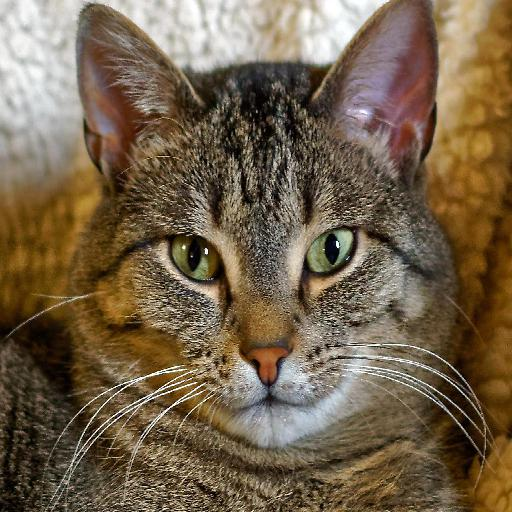

In [6]:
tf.keras.preprocessing.image.load_img(train_ds2_path + '/cat/flickr_cat_000014.jpg')

### Prepare data for training. Train and test sample generation

In [7]:
training_generator = ImageDataGenerator(rescale=1./255, # multiply the data by the value provided (after applying all other transformations)
                                        rotation_range=3, # Int. Degree range for random rotations. 
                                        horizontal_flip=True, #  Boolean. Randomly flip inputs horizontally. 
                                        zoom_range=0.2) # Float or [lower, upper]. Range for random zoom. If a float, [lower, upper] = [1-zoom_range, 1+zoom_range]

training_dataset = training_generator.flow_from_directory(train_ds2_path,
                                                     target_size = (64, 64),
                                                     batch_size = 32,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 14630 images belonging to 3 classes.


In [8]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory(test_ds2_path,
                                                     target_size = (64, 64),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 1500 images belonging to 3 classes.


# Build and teach a base model with a single dense softmax layer.
# The weights should be initialized with small random values, which are normally distributed with zero mean and single variance.



In [9]:
def build_model(lr=0.001):
    model = keras.Sequential()

    model.add(keras.layers.Input(shape = (784, )))
    
    model.add(keras.layers.Flatten())
    
    model.add(keras.layers.Dense(10, kernel_initializer = keras.initializers.RandomNormal(mean = 0., stddev = 1.), activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy',
                  optimizer = keras.optimizers.Adam(learning_rate = lr),
                  metrics = ['accuracy', keras.metrics.AUC()])

    return model

# MNIST

In [10]:
model = build_model()

history = model.fit(x_train,
                    y_train,
                    epochs = epochs,
                    batch_size = 64,                                   
                    validation_split = 0.2,
                    verbose = False)

In [11]:
_, accuracy, auc = model.evaluate(x_test, y_test, verbose = 0)

print(f'Test accuracy: {np.round(100 * accuracy, 3)}%')
print(f'Test AUC: {np.round(100 * auc, 3)}%')

Test accuracy: 89.25%
Test AUC: 98.259%


## Animal faces dataset

In [12]:
def build_model(lr=0.01):
    model = keras.Sequential()
    
    model.add(keras.layers.Input(shape = (64,64,3)))
    
    model.add(keras.layers.Flatten())

    model.add(keras.layers.Dense(units = 3, kernel_initializer = keras.initializers.RandomNormal(mean = 0., stddev = 1.), activation = 'softmax', input_shape = (12288,)))

    model.compile(loss = 'categorical_crossentropy',
                  optimizer = keras.optimizers.Adam(learning_rate = lr),
                  metrics = ['accuracy', keras.metrics.AUC()])

    return model

In [13]:
model_anim = build_model()

history = model_anim.fit(training_dataset,
                    epochs = 10)

Epoch 1/10
458/458 [==============================] - 115s 250ms/step - loss: 39.5661 - accuracy: 0.4105 - auc_1: 0.5618
Epoch 2/10
458/458 [==============================] - 45s 99ms/step - loss: 21.8078 - accuracy: 0.5101 - auc_1: 0.6440
Epoch 3/10
458/458 [==============================] - 40s 88ms/step - loss: 23.0455 - accuracy: 0.5714 - auc_1: 0.6891
Epoch 4/10
458/458 [==============================] - 43s 93ms/step - loss: 23.4325 - accuracy: 0.5225 - auc_1: 0.6498
Epoch 5/10
458/458 [==============================] - 41s 90ms/step - loss: 17.9662 - accuracy: 0.5937 - auc_1: 0.7078
Epoch 6/10
458/458 [==============================] - 49s 107ms/step - loss: 18.0865 - accuracy: 0.5957 - auc_1: 0.7092
Epoch 7/10
458/458 [==============================] - 46s 100ms/step - loss: 26.0149 - accuracy: 0.5641 - auc_1: 0.6826
Epoch 8/10
458/458 [==============================] - 43s 95ms/step - loss: 20.1647 - accuracy: 0.6135 - auc_1: 0.7211
Epoch 9/10
458/458 [========================

In [14]:
_, accuracy, auc = model_anim.evaluate(test_dataset, verbose = 0)

print(f'Test accuracy: {np.round(100 * accuracy, 3)}%')
print(f'Test AUC: {np.round(100 * auc, 3)}%')

Test accuracy: 65.2%
Test AUC: 75.235%


# Build deep models with several hidden layers ReLU or tanh.
## Models with symmetric tanh \ asymmetric ReLU activation functions should be taught with the gradient descent. 
- ### For models with tanh use the Glorot weights initialization.
- ### For models with ReLU use the He weights initialization.

## For each model plot:
- ### loss function change while training (for each n epochs)
- ### accuracy change on train and test sample for each epoch

##################################################################################

In [15]:
N_CLASSES_MNIST = 10
N_CLASSES_ANIM = 3
INPUT_SHAPE_MNIST = (784,)
INPUT_SHAPE_ANIM = (64, 64, 3)
EPOCHS = 10

In [16]:
def build_model(n_classes, input_shape, activation, weights_init = 'classic', lr=0.001):
    if weights_init == 'classic':
        kernel_initializer = keras.initializers.RandomNormal(mean = 0., stddev = 1.)
    elif weights_init == 'glorot':
        kernel_initializer = keras.initializers.GlorotNormal()
    elif weights_init == 'he':
        kernel_initializer = keras.initializers.HeNormal()
    else:
        raise Exception("Wrong initializer selected, please select classic, glorot or he option!")
    
    if activation not in ['relu', 'tanh']:
        raise Exception("Wrong activation fuction selected, please select relu or tanh!")
    
    model = keras.Sequential()
    model.add(keras.layers.Input(shape = input_shape))
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512, kernel_initializer = kernel_initializer, activation = activation))
    model.add(keras.layers.Dense(256, activation = activation))
    model.add(keras.layers.Dense(n_classes, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy',
                optimizer = keras.optimizers.SGD(learning_rate = lr),
                metrics = ['accuracy', keras.metrics.AUC()])
    
    return model

In [17]:
accuracy_df = pd.DataFrame(columns = ['MNIST', 'ANIM FACES'], index = ['tanh_classic', 'tanh_glorot', 'relu_classic', 'relu_he'], dtype = float)
accuracy_df

MNIST  ANIM FACES
tanh_classic    NaN         NaN
tanh_glorot     NaN         NaN
relu_classic    NaN         NaN
relu_he         NaN         NaN

In [18]:
def evaluate_model(model, model_name = None, dataset_name = None, *test_data):
    _, accuracy, auc = model.evaluate(*test_data, verbose = 0)

    accuracy = np.round(100 * accuracy, 3)
    auc = np.round(100 * auc, 3)
    
    if model_name:
        accuracy_df.loc[model_name][dataset_name] = accuracy
    
    print(f'Test accuracy: {accuracy}%')
    print(f'Test AUC: {auc}%')

## 1) tanh model

### MNIST 

#### A) Classic weights init (Normally distributed with mean = 0 and var = 1) 

In [19]:
tanh_model_mnist_classic = build_model(N_CLASSES_MNIST, INPUT_SHAPE_MNIST, 'tanh')

tanh_history_mnist_classic = tanh_model_mnist_classic.fit(x_train,
                          y_train,
                          epochs = EPOCHS,
                          batch_size = 64,                                   
                          validation_split = 0.2,
                          verbose = False)

In [20]:
evaluate_model(tanh_model_mnist_classic, 'tanh_classic', 'MNIST', x_test, y_test)

Test accuracy: 88.47%
Test AUC: 98.98%


#### B) Glorot weights init

In [21]:
tanh_model_mnist_glorot = build_model(N_CLASSES_MNIST, INPUT_SHAPE_MNIST, 'tanh', 'glorot')

tanh_history_mnist_glorot = tanh_model_mnist_glorot.fit(x_train,
                          y_train,
                          epochs = EPOCHS,
                          batch_size = 64,                                   
                          validation_split = 0.2,
                          verbose = False)

In [22]:
evaluate_model(tanh_model_mnist_glorot, 'tanh_glorot', 'MNIST', x_test, y_test)

Test accuracy: 89.43%
Test AUC: 99.093%


### Animal faces dataset

#### A) Classic weights init (Normally distributed with mean = 0 and var = 1) 

In [23]:
tanh_model_anim_classic = build_model(N_CLASSES_ANIM, INPUT_SHAPE_ANIM, 'tanh')

tanh_history_anim_classic = tanh_model_anim_classic.fit(training_dataset,
                          epochs = EPOCHS,
                          batch_size = 64,                                   
                          validation_data = test_dataset,
                          verbose = True)

Epoch 1/10
458/458 [==============================] - 54s 118ms/step - loss: 1.1826 - accuracy: 0.3731 - auc_4: 0.5538 - val_loss: 1.1091 - val_accuracy: 0.4260 - val_auc_4: 0.6319
Epoch 2/10
458/458 [==============================] - 58s 126ms/step - loss: 1.0220 - accuracy: 0.4866 - auc_4: 0.6735 - val_loss: 0.9246 - val_accuracy: 0.5653 - val_auc_4: 0.7467
Epoch 3/10
458/458 [==============================] - 58s 126ms/step - loss: 0.9491 - accuracy: 0.5395 - auc_4: 0.7291 - val_loss: 0.9022 - val_accuracy: 0.5713 - val_auc_4: 0.7606
Epoch 4/10
458/458 [==============================] - 57s 125ms/step - loss: 0.9020 - accuracy: 0.5752 - auc_4: 0.7625 - val_loss: 0.8818 - val_accuracy: 0.5807 - val_auc_4: 0.7726
Epoch 5/10
458/458 [==============================] - 61s 132ms/step - loss: 0.8771 - accuracy: 0.5917 - auc_4: 0.7771 - val_loss: 0.8683 - val_accuracy: 0.5887 - val_auc_4: 0.7820
Epoch 6/10
458/458 [==============================] - 58s 126ms/step - loss: 0.8447 - accuracy:

In [24]:
evaluate_model(tanh_model_anim_classic, 'tanh_classic', 'ANIM FACES', test_dataset)

Test accuracy: 61.6%
Test AUC: 80.117%


#### B) Glorot weights init

In [25]:
tanh_model_anim_glorot = build_model(N_CLASSES_ANIM, INPUT_SHAPE_ANIM, 'tanh', 'glorot')

tanh_history_anim_glorot = tanh_model_anim_glorot.fit(training_dataset,
                          epochs = EPOCHS,
                          batch_size = 64,                                   
                          validation_data = test_dataset,
                          verbose = True)

Epoch 1/10
458/458 [==============================] - 59s 128ms/step - loss: 1.2756 - accuracy: 0.3891 - auc_5: 0.5519 - val_loss: 0.9308 - val_accuracy: 0.5813 - val_auc_5: 0.7504
Epoch 2/10
458/458 [==============================] - 56s 122ms/step - loss: 0.9830 - accuracy: 0.5218 - auc_5: 0.7053 - val_loss: 0.8518 - val_accuracy: 0.6013 - val_auc_5: 0.7978
Epoch 3/10
458/458 [==============================] - 57s 124ms/step - loss: 0.9008 - accuracy: 0.5695 - auc_5: 0.7614 - val_loss: 0.8643 - val_accuracy: 0.6187 - val_auc_5: 0.7870
Epoch 4/10
458/458 [==============================] - 54s 118ms/step - loss: 0.8617 - accuracy: 0.5999 - auc_5: 0.7861 - val_loss: 0.7679 - val_accuracy: 0.6687 - val_auc_5: 0.8396
Epoch 5/10
458/458 [==============================] - 52s 113ms/step - loss: 0.8310 - accuracy: 0.6217 - auc_5: 0.8038 - val_loss: 0.7747 - val_accuracy: 0.6447 - val_auc_5: 0.8298
Epoch 6/10
458/458 [==============================] - 57s 124ms/step - loss: 0.8001 - accuracy:

In [26]:
evaluate_model(tanh_model_anim_glorot, 'tanh_glorot', 'ANIM FACES', test_dataset)

Test accuracy: 71.667%
Test AUC: 87.915%


## 2) ReLu model with He weights init

### MNIST 

#### A) Classic weights init (Normally distributed with mean = 0 and var = 1) 

In [27]:
relu_model_mnist_classic = build_model(N_CLASSES_MNIST, INPUT_SHAPE_MNIST, 'relu')

relu_history_mnist_classic = relu_model_mnist_classic.fit(x_train,
                          y_train,
                          epochs = EPOCHS,
                          batch_size = 64,                                   
                          validation_split = 0.2,
                          verbose = False)

In [28]:
evaluate_model(relu_model_mnist_classic, 'relu_classic', 'MNIST', x_test, y_test)

Test accuracy: 93.37%
Test AUC: 99.432%


#### B) He weights init

In [29]:
relu_model_mnist_he = build_model(N_CLASSES_MNIST, INPUT_SHAPE_MNIST, 'relu', 'he')

relu_history_mnist_he = relu_model_mnist_he.fit(x_train,
                          y_train,
                          epochs = EPOCHS,
                          batch_size = 64,                                   
                          validation_split = 0.2,
                          verbose = False)

In [30]:
evaluate_model(relu_model_mnist_he, 'relu_he', 'MNIST', x_test, y_test)

Test accuracy: 89.71%
Test AUC: 99.116%


### Animal faces dataset

#### A) Classic weights init (Normally distributed with mean = 0 and var = 1) 

In [31]:
relu_model_anim_classic = build_model(N_CLASSES_ANIM, INPUT_SHAPE_ANIM, 'relu')

relu_history_anim_classic = relu_model_anim_classic.fit(training_dataset,
                          epochs = EPOCHS,
                          batch_size = 64,                                   
                          validation_data = test_dataset,
                          verbose = True)

Epoch 1/10
458/458 [==============================] - 55s 119ms/step - loss: 12.0267 - accuracy: 0.4093 - auc_8: 0.5814 - val_loss: 1.0974 - val_accuracy: 0.4813 - val_auc_8: 0.6736
Epoch 2/10
458/458 [==============================] - 52s 113ms/step - loss: 0.9937 - accuracy: 0.5293 - auc_8: 0.7139 - val_loss: 1.0175 - val_accuracy: 0.4980 - val_auc_8: 0.7004
Epoch 3/10
458/458 [==============================] - 57s 124ms/step - loss: 0.9602 - accuracy: 0.5431 - auc_8: 0.7307 - val_loss: 1.0149 - val_accuracy: 0.5033 - val_auc_8: 0.7184
Epoch 4/10
458/458 [==============================] - 53s 116ms/step - loss: 0.9162 - accuracy: 0.5740 - auc_8: 0.7597 - val_loss: 0.8785 - val_accuracy: 0.5913 - val_auc_8: 0.7798
Epoch 5/10
458/458 [==============================] - 59s 128ms/step - loss: 0.8930 - accuracy: 0.5905 - auc_8: 0.7733 - val_loss: 0.8365 - val_accuracy: 0.6313 - val_auc_8: 0.8032
Epoch 6/10
458/458 [==============================] - 59s 129ms/step - loss: 0.8644 - accuracy

In [32]:
evaluate_model(relu_model_anim_classic, 'relu_classic', 'ANIM FACES', test_dataset)

Test accuracy: 59.267%
Test AUC: 78.53%


#### B) He weights init

In [33]:
relu_model_anim_he = build_model(N_CLASSES_ANIM, INPUT_SHAPE_ANIM, 'relu', 'he')

relu_history_anim_he = relu_model_anim_he.fit(training_dataset,
                          epochs = EPOCHS,
                          batch_size = 64,                                   
                          validation_data = test_dataset,
                          verbose = True)

Epoch 1/10
458/458 [==============================] - 58s 125ms/step - loss: 1.1342 - accuracy: 0.4121 - auc_9: 0.5917 - val_loss: 0.9364 - val_accuracy: 0.5307 - val_auc_9: 0.7412
Epoch 2/10
458/458 [==============================] - 55s 120ms/step - loss: 0.9434 - accuracy: 0.5536 - auc_9: 0.7357 - val_loss: 0.8327 - val_accuracy: 0.6333 - val_auc_9: 0.8200
Epoch 3/10
458/458 [==============================] - 55s 120ms/step - loss: 0.8923 - accuracy: 0.5856 - auc_9: 0.7697 - val_loss: 0.8816 - val_accuracy: 0.5673 - val_auc_9: 0.7708
Epoch 4/10
458/458 [==============================] - 54s 119ms/step - loss: 0.8563 - accuracy: 0.6174 - auc_9: 0.7924 - val_loss: 0.7749 - val_accuracy: 0.6713 - val_auc_9: 0.8391
Epoch 5/10
458/458 [==============================] - 51s 112ms/step - loss: 0.7883 - accuracy: 0.6477 - auc_9: 0.8277 - val_loss: 0.7417 - val_accuracy: 0.6773 - val_auc_9: 0.8511
Epoch 6/10
458/458 [==============================] - 50s 108ms/step - loss: 0.7675 - accuracy:

In [34]:
 _, accuracy, auc = relu_model_anim_he.evaluate(test_dataset, verbose = 0)

evaluate_model(relu_model_anim_he, 'relu_he', 'ANIM FACES', test_dataset)

Test accuracy: 66.0%
Test AUC: 83.917%


## Loss plot, accuracy plots, conclusions

### Mnist

In [35]:
mnist_models_training_history = [
    (tanh_history_mnist_classic, 'tanh', 'Normal'),
    (tanh_history_mnist_glorot, 'tanh', 'Glorot'),
    (relu_history_mnist_classic, 'ReLu', 'Normal'),
    (relu_history_mnist_he, 'ReLu', 'He')
]

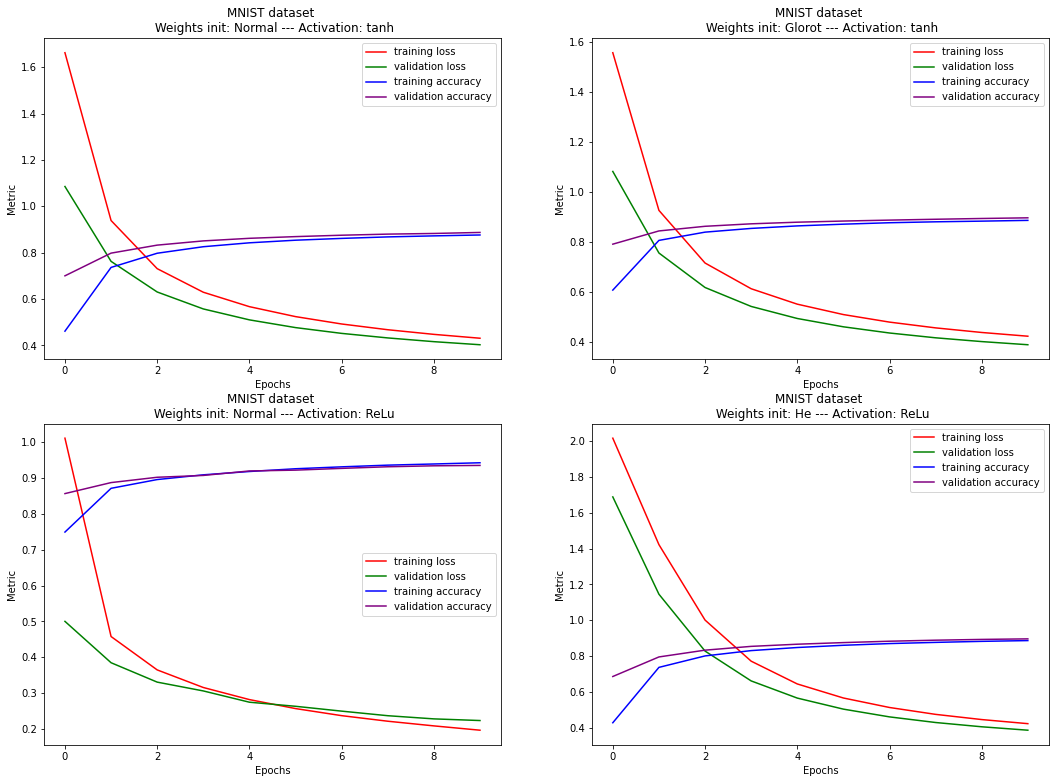

In [36]:
fig, axs = plt.subplots(2, 2, figsize = (18, 13))
i,j = 0,0
for hist in mnist_models_training_history:
    axs[i][j].plot(range(EPOCHS), hist[0].history['loss'], 'r', label = 'training loss')
    axs[i][j].plot(range(EPOCHS), hist[0].history['val_loss'], 'g', label = 'validation loss')
    axs[i][j].plot(range(EPOCHS), hist[0].history['accuracy'], 'b', label = 'training accuracy')
    axs[i][j].plot(range(EPOCHS), hist[0].history['val_accuracy'], 'purple', label = 'validation accuracy')
    axs[i][j].set_title("MNIST dataset \n Weights init: %s --- Activation: %s" % (hist[2], hist[1]))
    axs[i][j].set_xlabel('Epochs')
    axs[i][j].set_ylabel('Metric')
    axs[i][j].legend()
    j+=1
    if j%2==0:
        i+=1
        j=0

### Animal faces

In [37]:
anim_models_training_history = [
    (tanh_history_anim_classic, 'tanh', 'Normal'),
    (tanh_history_anim_glorot, 'tanh', 'Glorot'),
    (relu_history_anim_classic, 'ReLu', 'Normal'),
    (relu_history_anim_he, 'ReLu', 'He')
]

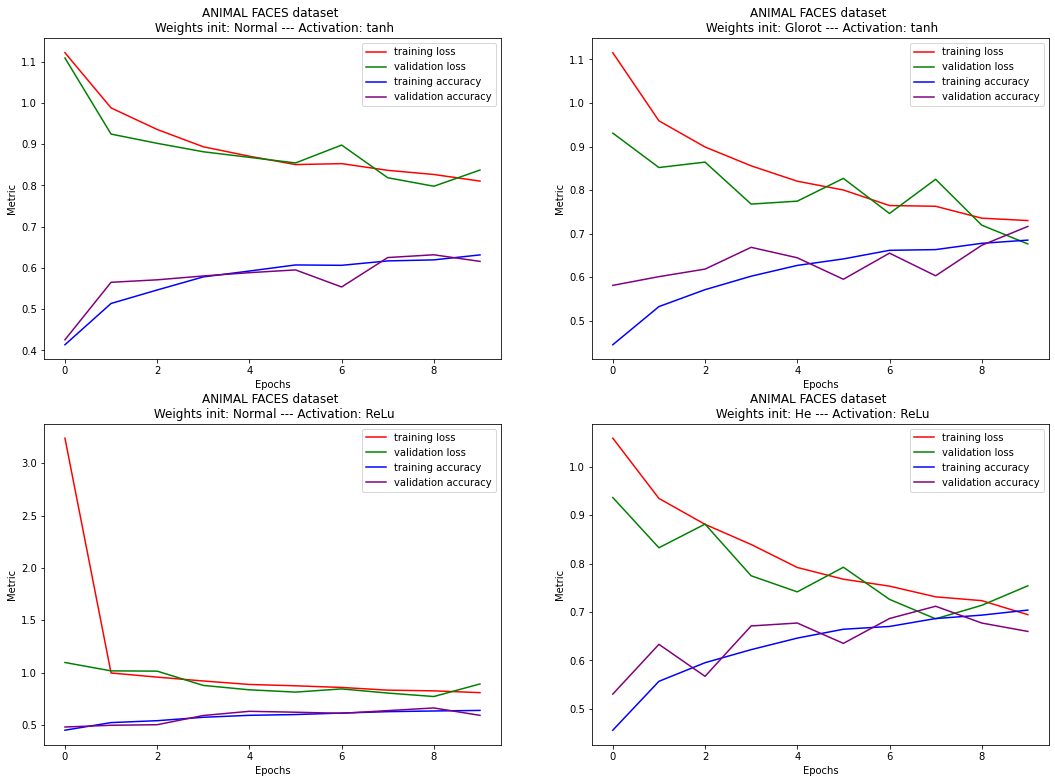

In [38]:
fig, axs = plt.subplots(2, 2, figsize = (18, 13))
i,j = 0,0
for hist in anim_models_training_history:
    axs[i][j].plot(range(EPOCHS), hist[0].history['loss'], 'r', label = 'training loss')
    axs[i][j].plot(range(EPOCHS), hist[0].history['val_loss'], 'g', label = 'validation loss')
    axs[i][j].plot(range(EPOCHS), hist[0].history['accuracy'], 'b', label = 'training accuracy')
    axs[i][j].plot(range(EPOCHS), hist[0].history['val_accuracy'], 'purple', label = 'validation accuracy')
    axs[i][j].set_title("ANIMAL FACES dataset \n Weights init: %s --- Activation: %s" % (hist[2], hist[1]))
    axs[i][j].set_xlabel('Epochs')
    axs[i][j].set_ylabel('Metric')
    axs[i][j].legend()
    j+=1
    if j%2==0:
        i+=1
        j=0

### Accuracies for each model

In [39]:
accuracy_df

MNIST  ANIM FACES
tanh_classic  88.47      61.600
tanh_glorot   89.43      71.667
relu_classic  93.37      59.267
relu_he       89.71      66.000

### Colclusions:

MNIST: 

- Models with Relu activation are better according to the accuracy metric
- Among models with tanh activation - model with glorot weights did better accuracy and vise versa for models with tanh activation.
- Small overfitting is observed in the case of RELU model with classic init weights distribution
- The best model according to the accuracy metric - model with ReLu activation and classic init weihts

ANIM FACES:

- The loss curve much differs between the case of the classic initial weights and glorot/he. 
 In the first case, it is much smoother
- In the case of the model with tanh activation and glorot init weights - a strong overprocessing is observed
- The best case according to accuracy metric - model with relu activation and He weights init distribution, so it will be used in the future study.



# Learning rate hyperparameter training

## MNIST

In [40]:
lrs = 4
lr_results = []
for lr in [10**(-i) for i in range(1, lrs + 1)]:
    model = build_model(N_CLASSES_MNIST, INPUT_SHAPE_MNIST, 'relu', lr = lr)

    hist = model.fit(x_train,
                    y_train,
                    epochs = EPOCHS,
                    batch_size = 64,                                   
                    validation_split = 0.2,
                    verbose = False)
    
    _, accuracy, auc = model.evaluate(x_test, y_test, verbose = 0)

    accuracy = np.round(100 * accuracy, 3)
    auc = np.round(100 * auc, 3)

    lr_results.append(
        {
            
            "lr": lr,
            "hist": hist,
            "accuracy": accuracy,
            "auc": auc
            
        }
    )

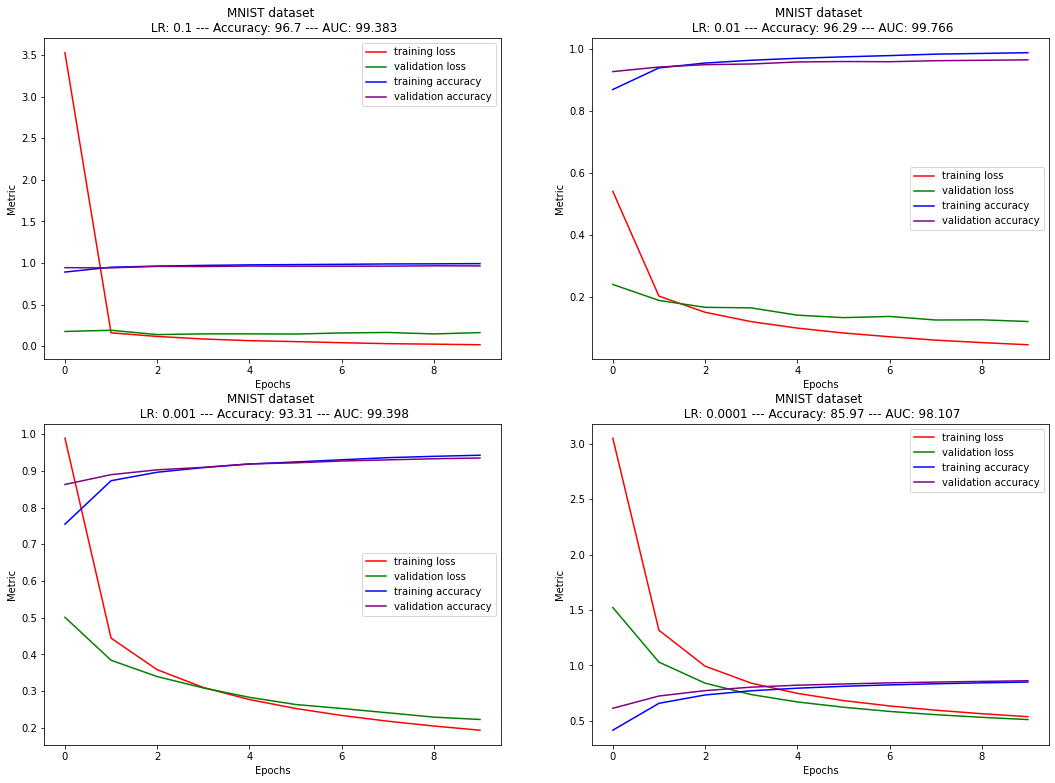

In [41]:
fig, axs = plt.subplots(2, 2, figsize = (18, 13))
i,j = 0,0
for lr in lr_results:
    axs[i][j].plot(range(EPOCHS), lr['hist'].history['loss'], 'r', label = 'training loss')
    axs[i][j].plot(range(EPOCHS), lr['hist'].history['val_loss'], 'g', label = 'validation loss')
    axs[i][j].plot(range(EPOCHS), lr['hist'].history['accuracy'], 'b', label = 'training accuracy')
    axs[i][j].plot(range(EPOCHS), lr['hist'].history['val_accuracy'], 'purple', label = 'validation accuracy')
    axs[i][j].set_title("MNIST dataset \n LR: %s --- Accuracy: %s --- AUC: %s" % (lr['lr'], lr['accuracy'], lr['auc']))
    axs[i][j].set_xlabel('Epochs')
    axs[i][j].set_ylabel('Metric')
    axs[i][j].legend()
    j+=1
    if j%2==0:
        i+=1
        j=0

#### The model showed the best accuracy according to the metrics at a learning rate of 0.01. 
#### Despite the fact that there was a slight overfitting of the model, it still showed the best accuracy on the test data.

## Animal faces

In [42]:
lrs = 4
lr_results = []
for lr in [10**(-i) for i in range(1, lrs + 1)]:
    model = build_model(N_CLASSES_ANIM, INPUT_SHAPE_ANIM, 'relu', 'he')

    hist = model.fit(training_dataset,
                     epochs = EPOCHS,
                     batch_size = 64,                                   
                     validation_data = test_dataset,
                     verbose = False)
    
    _, accuracy, auc = model.evaluate(test_dataset, verbose = 0)

    accuracy = np.round(100 * accuracy, 3)
    auc = np.round(100 * auc, 3)

    lr_results.append(
        {
            
            "lr": lr,
            "hist": hist,
            "accuracy": accuracy,
            "auc": auc
            
        }
    )

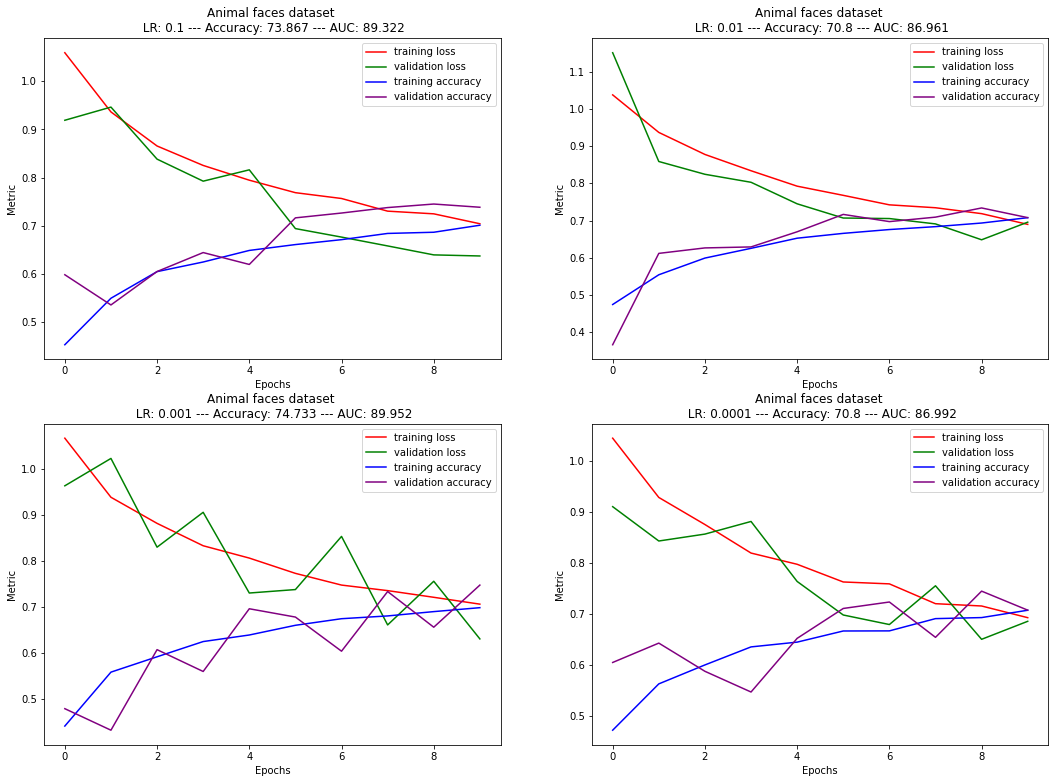

In [43]:
fig, axs = plt.subplots(2, 2, figsize = (18, 13))
i,j = 0,0
for lr in lr_results:
    axs[i][j].plot(range(EPOCHS), lr['hist'].history['loss'], 'r', label = 'training loss')
    axs[i][j].plot(range(EPOCHS), lr['hist'].history['val_loss'], 'g', label = 'validation loss')
    axs[i][j].plot(range(EPOCHS), lr['hist'].history['accuracy'], 'b', label = 'training accuracy')
    axs[i][j].plot(range(EPOCHS), lr['hist'].history['val_accuracy'], 'purple', label = 'validation accuracy')
    axs[i][j].set_title("Animal faces dataset \n LR: %s --- Accuracy: %s --- AUC: %s" % (lr['lr'], lr['accuracy'], lr['auc']))
    axs[i][j].set_xlabel('Epochs')
    axs[i][j].set_ylabel('Metric')
    axs[i][j].legend()
    j+=1
    if j%2==0:
        i+=1
        j=0

#### The model showed the best accuracy according to the metrics at a learning rate of 0.001.
#### In addition, the loss curve shows an obvious overfitting of the model.

# Using Saver, save checkpoints during training. Save the resulting models at the end of the training. Restore the last checkpoint when starting the model if training was interrupted.

In [44]:
import os

checkpoint_dir = "./ckpt"
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

## ToDO: pack into class no specify the full scope of build_args
def build_or_restore_model(model_name, *build_args):
    # Either restore the latest model, or create a fresh one
    # if there is no checkpoint available.
    checkpoints = [name for name in os.listdir(checkpoint_dir)]
    model_checkpoint = model_name
    if model_checkpoint in checkpoints:
        model_checkpoint = checkpoint_dir + '/' + model_checkpoint
        print("Restoring from", model_checkpoint)
        return keras.models.load_model(model_checkpoint)
    print("Creating a new model")
    return build_model(*build_args)

In [45]:
model_name = "mnist_model_test_saver"
model = build_or_restore_model(model_name, N_CLASSES_MNIST, INPUT_SHAPE_MNIST, 'relu', 'classic', 0.01)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_dir + '/' + model_name, 
        monitor = 'accuracy',
        verbose = True,
        save_best_only = True
    )
]
model.fit(x_train,
    y_train,
    epochs = EPOCHS,
    batch_size = 64,                                   
    validation_split = 0.2,
    callbacks=callbacks,
    verbose = False)

Restoring from ./ckpt/mnist_model_test_saver

Epoch 00001: accuracy improved from -inf to 0.99985, saving model to ./ckpt/mnist_model_test_saver
INFO:tensorflow:Assets written to: ./ckpt/mnist_model_test_saver/assets

Epoch 00002: accuracy improved from 0.99985 to 0.99992, saving model to ./ckpt/mnist_model_test_saver
INFO:tensorflow:Assets written to: ./ckpt/mnist_model_test_saver/assets

Epoch 00003: accuracy did not improve from 0.99992

Epoch 00004: accuracy improved from 0.99992 to 0.99994, saving model to ./ckpt/mnist_model_test_saver
INFO:tensorflow:Assets written to: ./ckpt/mnist_model_test_saver/assets

Epoch 00005: accuracy did not improve from 0.99994

Epoch 00006: accuracy did not improve from 0.99994

Epoch 00007: accuracy improved from 0.99994 to 0.99996, saving model to ./ckpt/mnist_model_test_saver
INFO:tensorflow:Assets written to: ./ckpt/mnist_model_test_saver/assets

Epoch 00008: accuracy improved from 0.99996 to 0.99998, saving model to ./ckpt/mnist_model_test_saver

# Select different activation functions for neurons of hidden layers: LeakyReLU, Parametric LeakyReLU, ELU. 
# Investigate how the choice of activation function affects:
- network training time
- network accyracy
- prediction time

In [46]:
import time

def build_model(n_classes, input_shape, activation, weights_init = 'classic', lr=0.001):
    if weights_init == 'classic':
        kernel_initializer = keras.initializers.RandomNormal(mean = 0., stddev = 1.)
    elif weights_init == 'glorot':
        kernel_initializer = keras.initializers.GlorotNormal()
    elif weights_init == 'he':
        kernel_initializer = keras.initializers.HeNormal()
    else:
        raise Exception("Wrong initializer selected, please select classic, glorot or he option!")
    
    model = keras.Sequential()
    model.add(keras.layers.Input(shape = input_shape))
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512, kernel_initializer = kernel_initializer, activation = activation))
    model.add(keras.layers.Dense(256, activation = activation))
    model.add(keras.layers.Dense(n_classes, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy',
                optimizer = keras.optimizers.SGD(learning_rate = lr),
                metrics = ['accuracy', keras.metrics.AUC()])
    
    return model

## MNIST

In [47]:
def mnist_model_time_test(model, x_train, y_train, x_test, y_test):
    prediction_time = 0

    learning_start_time = time.time()

    hist = model.fit(x_train,
                     y_train,
                     epochs = epochs,
                     batch_size = 64,                                   
                     validation_split = 0.2,
                     verbose = False)
    
    learning_end_time = time.time()

    learning_time = learning_end_time - learning_start_time

    train_accuracy = np.round(100 * hist.history['accuracy'][-1], 3)

    prediction_start_time = time.time()

    _, accuracy, auc = model.evaluate(x_test, y_test, verbose = 0)

    prediction_end_time = time.time()

    prediction_time = prediction_end_time - prediction_start_time

    test_accuracy = np.round(100 * accuracy, 3)

    print(f'learning time {learning_time} s')
    print(f'prediciton time {prediction_time} s')
    print(f'train accuracy {train_accuracy}%, test accuracy {test_accuracy}%')

### RELU activation

In [48]:
activation = 'relu'
model = build_model(N_CLASSES_MNIST, INPUT_SHAPE_MNIST, activation, lr = 0.01)
mnist_model_time_test(model, x_train, y_train, x_test, y_test)

learning time 40.058791637420654 s
prediciton time 0.5869026184082031 s
train accuracy 98.9%, test accuracy 96.46%


### LEAKY RELU activation

In [49]:
activation = tf.keras.layers.LeakyReLU(alpha = 0.001)
model = build_model(N_CLASSES_MNIST, INPUT_SHAPE_MNIST, activation, lr = 0.01)
mnist_model_time_test(model, x_train, y_train, x_test, y_test)

learning time 43.50578236579895 s
prediciton time 0.7574312686920166 s
train accuracy 98.877%, test accuracy 96.6%


### ELU activation

In [50]:
activation = tf.keras.activations.elu
model = build_model(N_CLASSES_MNIST, INPUT_SHAPE_MNIST, activation, lr = 0.01)
mnist_model_time_test(model, x_train, y_train, x_test, y_test)

learning time 45.38985896110535 s
prediciton time 0.8792767524719238 s
train accuracy 99.023%, test accuracy 96.6%


## Animal faces

In [51]:
def anim_model_time_test(model, training_dataset, test_dataset):
    prediction_time = 0

    learning_start_time = time.time()

    hist = model.fit(training_dataset,
                     epochs = EPOCHS,
                     batch_size = 64,                                   
                     validation_data = test_dataset,
                     verbose = True)
    
    learning_end_time = time.time()

    learning_time = learning_end_time - learning_start_time

    train_accuracy = np.round(100 * hist.history['accuracy'][-1], 3)

    prediction_start_time = time.time()

    _, accuracy, auc = model.evaluate(test_dataset, verbose = 0)

    prediction_end_time = time.time()

    prediction_time = prediction_end_time - prediction_start_time

    test_accuracy = np.round(100 * accuracy, 3)

    print(f'learning time {learning_time} s')
    print(f'prediciton time {prediction_time} s')
    print(f'train accuracy {train_accuracy}%, test accuracy {test_accuracy}%')

### RELU activation

In [52]:
activation = 'relu'
model = build_model(N_CLASSES_ANIM, INPUT_SHAPE_ANIM, activation, 'he', lr = 0.001)
anim_model_time_test(model, training_dataset, test_dataset)

Epoch 1/10
458/458 [==============================] - 68s 146ms/step - loss: 1.1236 - accuracy: 0.3818 - auc_21: 0.5607 - val_loss: 0.9660 - val_accuracy: 0.5773 - val_auc_21: 0.7311
Epoch 2/10
458/458 [==============================] - 64s 139ms/step - loss: 0.9535 - accuracy: 0.5300 - auc_21: 0.7256 - val_loss: 0.8313 - val_accuracy: 0.6680 - val_auc_21: 0.8342
Epoch 3/10
458/458 [==============================] - 59s 130ms/step - loss: 0.8725 - accuracy: 0.6043 - auc_21: 0.7831 - val_loss: 0.8072 - val_accuracy: 0.6273 - val_auc_21: 0.8239
Epoch 4/10
458/458 [==============================] - 64s 140ms/step - loss: 0.8304 - accuracy: 0.6246 - auc_21: 0.8068 - val_loss: 1.0446 - val_accuracy: 0.4580 - val_auc_21: 0.7114
Epoch 5/10
458/458 [==============================] - 63s 138ms/step - loss: 0.8228 - accuracy: 0.6298 - auc_21: 0.8097 - val_loss: 0.7120 - val_accuracy: 0.7247 - val_auc_21: 0.8746
Epoch 6/10
458/458 [==============================] - 73s 160ms/step - loss: 0.8022 -

### LEAKY RELU activation

In [53]:
activation = tf.keras.layers.LeakyReLU(alpha = 0.001)
model = build_model(N_CLASSES_ANIM, INPUT_SHAPE_ANIM, activation, 'he', lr = 0.001)
anim_model_time_test(model, training_dataset, test_dataset)

Epoch 1/10
458/458 [==============================] - 65s 140ms/step - loss: 1.1369 - accuracy: 0.3952 - auc_22: 0.5874 - val_loss: 0.9124 - val_accuracy: 0.5713 - val_auc_22: 0.7705
Epoch 2/10
458/458 [==============================] - 62s 134ms/step - loss: 0.9421 - accuracy: 0.5485 - auc_22: 0.7363 - val_loss: 0.8797 - val_accuracy: 0.5753 - val_auc_22: 0.7784
Epoch 3/10
458/458 [==============================] - 66s 144ms/step - loss: 0.8506 - accuracy: 0.6124 - auc_22: 0.7948 - val_loss: 0.8554 - val_accuracy: 0.6240 - val_auc_22: 0.7937
Epoch 4/10
458/458 [==============================] - 55s 121ms/step - loss: 0.8441 - accuracy: 0.6135 - auc_22: 0.7980 - val_loss: 0.7418 - val_accuracy: 0.6933 - val_auc_22: 0.8607
Epoch 5/10
458/458 [==============================] - 58s 126ms/step - loss: 0.7860 - accuracy: 0.6501 - auc_22: 0.8298 - val_loss: 0.7164 - val_accuracy: 0.7020 - val_auc_22: 0.8685
Epoch 6/10
458/458 [==============================] - 56s 122ms/step - loss: 0.7743 -

### ELU activation

In [54]:
activation = tf.keras.activations.elu
model = build_model(N_CLASSES_ANIM, INPUT_SHAPE_ANIM, activation, 'he', lr = 0.001)
anim_model_time_test(model, training_dataset, test_dataset)

Epoch 1/10
458/458 [==============================] - 56s 122ms/step - loss: 1.4026 - accuracy: 0.3763 - auc_23: 0.5609 - val_loss: 0.9720 - val_accuracy: 0.5020 - val_auc_23: 0.7132
Epoch 2/10
458/458 [==============================] - 58s 126ms/step - loss: 0.9498 - accuracy: 0.5457 - auc_23: 0.7338 - val_loss: 0.9041 - val_accuracy: 0.5673 - val_auc_23: 0.7602
Epoch 3/10
458/458 [==============================] - 49s 108ms/step - loss: 0.9141 - accuracy: 0.5749 - auc_23: 0.7576 - val_loss: 0.9814 - val_accuracy: 0.4993 - val_auc_23: 0.7334
Epoch 4/10
458/458 [==============================] - 49s 107ms/step - loss: 0.8741 - accuracy: 0.5910 - auc_23: 0.7800 - val_loss: 0.7856 - val_accuracy: 0.6200 - val_auc_23: 0.8253
Epoch 5/10
458/458 [==============================] - 49s 106ms/step - loss: 0.8233 - accuracy: 0.6191 - auc_23: 0.8079 - val_loss: 0.8123 - val_accuracy: 0.6287 - val_auc_23: 0.8164
Epoch 6/10
458/458 [==============================] - 49s 108ms/step - loss: 0.8249 -

# Instead of the gradient descent method, use one of the adaptive methods: Nesterov gradient, Adagrad, Adadelta, Adam, and initialize the weights in the above mentioned ways. 
# Plot loss and accuracy curves

In [55]:
def build_model_adam(n_classes, input_shape, activation, weights_init = 'classic', lr=0.001):
    if weights_init == 'classic':
        kernel_initializer = keras.initializers.RandomNormal(mean = 0., stddev = 1.)
    elif weights_init == 'glorot':
        kernel_initializer = keras.initializers.GlorotNormal()
    elif weights_init == 'he':
        kernel_initializer = keras.initializers.HeNormal()
    else:
        raise Exception("Wrong initializer selected, please select classic, glorot or he option!")
    
    if activation not in ['relu', 'tanh']:
        raise Exception("Wrong activation fuction selected, please select relu or tanh!")
    
    model = keras.Sequential()
    model.add(keras.layers.Input(shape = input_shape))
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512, kernel_initializer = kernel_initializer, activation = activation))
    model.add(keras.layers.Dense(256, activation = activation))
    model.add(keras.layers.Dense(n_classes, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy',
                optimizer = keras.optimizers.Adam(learning_rate = lr),
                metrics = ['accuracy', keras.metrics.AUC()])
    
    return model

In [56]:
accuracy_df_adam = pd.DataFrame(columns = ['MNIST', 'ANIM FACES'], index = ['tanh_classic', 'tanh_glorot', 'relu_classic', 'relu_he'], dtype = float)
accuracy_df_adam

MNIST  ANIM FACES
tanh_classic    NaN         NaN
tanh_glorot     NaN         NaN
relu_classic    NaN         NaN
relu_he         NaN         NaN

In [57]:
def evaluate_model_adam(model, model_name = None, dataset_name = None, *test_data):
    _, accuracy, auc = model.evaluate(*test_data, verbose = 0)

    accuracy = np.round(100 * accuracy, 3)
    auc = np.round(100 * auc, 3)
    
    if model_name:
        accuracy_df_adam.loc[model_name][dataset_name] = accuracy
    
    print(f'Test accuracy: {accuracy}%')
    print(f'Test AUC: {auc}%')

## 1) tanh model

### MNIST 

#### A) Classic weights init (Normally distributed with mean = 0 and var = 1) 

In [58]:
tanh_model_mnist_classic_adam = build_model_adam(N_CLASSES_MNIST, INPUT_SHAPE_MNIST, 'tanh')

tanh_history_mnist_classic_adam = tanh_model_mnist_classic_adam.fit(x_train,
                                                                  y_train,
                                                                  epochs = EPOCHS,
                                                                  batch_size = 64,                                   
                                                                  validation_split = 0.2,
                                                                  verbose = False)

In [59]:
evaluate_model_adam(tanh_model_mnist_classic_adam, 'tanh_classic', 'MNIST', x_test, y_test)

Test accuracy: 96.86%
Test AUC: 99.575%


#### B) Glorot weights init

In [60]:
tanh_model_mnist_glorot_adam = build_model_adam(N_CLASSES_MNIST, INPUT_SHAPE_MNIST, 'tanh', 'glorot')

tanh_history_mnist_glorot_adam = tanh_model_mnist_glorot_adam.fit(x_train,
                                                                  y_train,
                                                                  epochs = EPOCHS,
                                                                  batch_size = 64,                                   
                                                                  validation_split = 0.2,
                                                                  verbose = False)

In [61]:
evaluate_model_adam(tanh_model_mnist_glorot_adam, 'tanh_glorot', 'MNIST', x_test, y_test)

Test accuracy: 97.45%
Test AUC: 99.72%


### Animal faces dataset

#### A) Classic weights init (Normally distributed with mean = 0 and var = 1) 

In [62]:
tanh_model_anim_classic_adam = build_model_adam(N_CLASSES_ANIM, INPUT_SHAPE_ANIM, 'tanh')

tanh_history_anim_classic_adam = tanh_model_anim_classic_adam.fit(training_dataset,
                                                                  epochs = EPOCHS,
                                                                  batch_size = 64,                                   
                                                                  validation_data = test_dataset,
                                                                  verbose = True)

Epoch 1/10
458/458 [==============================] - 54s 116ms/step - loss: 1.4057 - accuracy: 0.4373 - auc_26: 0.6002 - val_loss: 0.9688 - val_accuracy: 0.5053 - val_auc_26: 0.7230
Epoch 2/10
458/458 [==============================] - 51s 111ms/step - loss: 1.0606 - accuracy: 0.5085 - auc_26: 0.6783 - val_loss: 0.9479 - val_accuracy: 0.4673 - val_auc_26: 0.7103
Epoch 3/10
458/458 [==============================] - 52s 114ms/step - loss: 1.0075 - accuracy: 0.4940 - auc_26: 0.6934 - val_loss: 1.3189 - val_accuracy: 0.3700 - val_auc_26: 0.6490
Epoch 4/10
458/458 [==============================] - 52s 113ms/step - loss: 1.0186 - accuracy: 0.5042 - auc_26: 0.6978 - val_loss: 0.9599 - val_accuracy: 0.5427 - val_auc_26: 0.7298
Epoch 5/10
458/458 [==============================] - 51s 112ms/step - loss: 0.9443 - accuracy: 0.5641 - auc_26: 0.7422 - val_loss: 1.0902 - val_accuracy: 0.5473 - val_auc_26: 0.7104
Epoch 6/10
458/458 [==============================] - 51s 112ms/step - loss: 0.9553 -

In [63]:
evaluate_model_adam(tanh_model_anim_classic_adam, 'tanh_classic', 'ANIM FACES', test_dataset)

Test accuracy: 65.667%
Test AUC: 82.539%


#### B) Glorot weights init

In [64]:
tanh_model_anim_glorot_adam = build_model_adam(N_CLASSES_ANIM, INPUT_SHAPE_ANIM, 'tanh', 'glorot')

tanh_history_anim_glorot_adam = tanh_model_anim_glorot_adam.fit(training_dataset,
                          epochs = EPOCHS,
                          batch_size = 64,                                   
                          validation_data = test_dataset,
                          verbose = True)

Epoch 1/10
458/458 [==============================] - 53s 114ms/step - loss: 1.5031 - accuracy: 0.3227 - auc_27: 0.4871 - val_loss: 1.2681 - val_accuracy: 0.3333 - val_auc_27: 0.5000
Epoch 2/10
458/458 [==============================] - 52s 113ms/step - loss: 1.1853 - accuracy: 0.3688 - auc_27: 0.5008 - val_loss: 1.4659 - val_accuracy: 0.3333 - val_auc_27: 0.5000
Epoch 3/10
458/458 [==============================] - 52s 113ms/step - loss: 1.2294 - accuracy: 0.3197 - auc_27: 0.4952 - val_loss: 1.2192 - val_accuracy: 0.3333 - val_auc_27: 0.5000
Epoch 4/10
458/458 [==============================] - 52s 114ms/step - loss: 1.1764 - accuracy: 0.3263 - auc_27: 0.4988 - val_loss: 1.1200 - val_accuracy: 0.3333 - val_auc_27: 0.5000
Epoch 5/10
458/458 [==============================] - 51s 111ms/step - loss: 1.1968 - accuracy: 0.3383 - auc_27: 0.4929 - val_loss: 1.2117 - val_accuracy: 0.3333 - val_auc_27: 0.5000
Epoch 6/10
458/458 [==============================] - 51s 112ms/step - loss: 1.1809 -

In [65]:
evaluate_model_adam(tanh_model_anim_glorot_adam, 'tanh_glorot', 'ANIM FACES', test_dataset)

Test accuracy: 33.333%
Test AUC: 50.0%


## 2) ReLu model with He weights init

### MNIST 

#### A) Classic weights init (Normally distributed with mean = 0 and var = 1) 

In [66]:
relu_model_mnist_classic_adam = build_model_adam(N_CLASSES_MNIST, INPUT_SHAPE_MNIST, 'relu')

relu_history_mnist_classic_adam = relu_model_mnist_classic_adam.fit(x_train,
                          y_train,
                          epochs = EPOCHS,
                          batch_size = 64,                                   
                          validation_split = 0.2,
                          verbose = False)

In [67]:
evaluate_model_adam(relu_model_mnist_classic_adam, 'relu_classic', 'MNIST', x_test, y_test)

Test accuracy: 96.95%
Test AUC: 99.395%


#### B) He weights init

In [68]:
relu_model_mnist_he_adam = build_model_adam(N_CLASSES_MNIST, INPUT_SHAPE_MNIST, 'relu', 'he')

relu_history_mnist_he_adam = relu_model_mnist_he_adam.fit(x_train,
                          y_train,
                          epochs = EPOCHS,
                          batch_size = 64,                                   
                          validation_split = 0.2,
                          verbose = False)

In [69]:
evaluate_model_adam(relu_model_mnist_he_adam, 'relu_he', 'MNIST', x_test, y_test)

Test accuracy: 97.61%
Test AUC: 99.671%


### Animal faces dataset

#### A) Classic weights init (Normally distributed with mean = 0 and var = 1) 

In [70]:
relu_model_anim_classic_adam = build_model_adam(N_CLASSES_ANIM, INPUT_SHAPE_ANIM, 'relu')

relu_history_anim_classic_adam = relu_model_anim_classic_adam.fit(training_dataset,
                          epochs = EPOCHS,
                          batch_size = 64,                                   
                          validation_data = test_dataset,
                          verbose = True)

Epoch 1/10
458/458 [==============================] - 52s 113ms/step - loss: 17.0102 - accuracy: 0.4280 - auc_30: 0.5946 - val_loss: 1.8126 - val_accuracy: 0.5193 - val_auc_30: 0.6962
Epoch 2/10
458/458 [==============================] - 52s 113ms/step - loss: 1.2598 - accuracy: 0.5520 - auc_30: 0.7334 - val_loss: 0.9138 - val_accuracy: 0.5900 - val_auc_30: 0.7782
Epoch 3/10
458/458 [==============================] - 51s 112ms/step - loss: 0.9098 - accuracy: 0.5858 - auc_30: 0.7768 - val_loss: 0.8209 - val_accuracy: 0.6387 - val_auc_30: 0.8137
Epoch 4/10
458/458 [==============================] - 51s 111ms/step - loss: 0.8130 - accuracy: 0.6440 - auc_30: 0.8208 - val_loss: 0.8687 - val_accuracy: 0.6107 - val_auc_30: 0.8043
Epoch 5/10
458/458 [==============================] - 50s 109ms/step - loss: 0.7931 - accuracy: 0.6556 - auc_30: 0.8297 - val_loss: 0.7195 - val_accuracy: 0.7007 - val_auc_30: 0.8647
Epoch 6/10
458/458 [==============================] - 50s 108ms/step - loss: 0.7463 

In [71]:
evaluate_model_adam(relu_model_anim_classic_adam, 'relu_classic', 'ANIM FACES', test_dataset)

Test accuracy: 75.067%
Test AUC: 89.69%


#### B) He weights init

In [72]:
relu_model_anim_he_adam = build_model_adam(N_CLASSES_ANIM, INPUT_SHAPE_ANIM, 'relu', 'he')

relu_history_anim_he_adam = relu_model_anim_he_adam.fit(training_dataset,
                          epochs = EPOCHS,
                          batch_size = 64,                                   
                          validation_data = test_dataset,
                          verbose = True)

Epoch 1/10
458/458 [==============================] - 51s 110ms/step - loss: 3.6895 - accuracy: 0.3881 - auc_31: 0.5441 - val_loss: 1.1549 - val_accuracy: 0.3187 - val_auc_31: 0.5594
Epoch 2/10
458/458 [==============================] - 50s 109ms/step - loss: 1.0930 - accuracy: 0.3295 - auc_31: 0.5434 - val_loss: 1.0346 - val_accuracy: 0.4533 - val_auc_31: 0.6442
Epoch 3/10
458/458 [==============================] - 51s 110ms/step - loss: 1.0553 - accuracy: 0.4274 - auc_31: 0.5964 - val_loss: 1.0102 - val_accuracy: 0.4907 - val_auc_31: 0.6650
Epoch 4/10
458/458 [==============================] - 50s 109ms/step - loss: 1.1006 - accuracy: 0.3306 - auc_31: 0.5215 - val_loss: 1.0992 - val_accuracy: 0.3333 - val_auc_31: 0.5002
Epoch 5/10
458/458 [==============================] - 49s 108ms/step - loss: 1.1038 - accuracy: 0.3329 - auc_31: 0.4690 - val_loss: 1.0986 - val_accuracy: 0.3333 - val_auc_31: 0.5009
Epoch 6/10
458/458 [==============================] - 51s 111ms/step - loss: 1.0887 -

In [73]:
evaluate_model_adam(relu_model_anim_he_adam, 'relu_he', 'ANIM FACES', test_dataset)

Test accuracy: 49.533%
Test AUC: 66.698%


## Loss plot, accuracy plots, conclusions

### Mnist

In [74]:
mnist_models_training_history_adam = [
    (tanh_history_mnist_classic_adam, 'tanh', 'Normal'),
    (tanh_history_mnist_glorot_adam, 'tanh', 'Glorot'),
    (relu_history_mnist_classic_adam, 'ReLu', 'Normal'),
    (relu_history_mnist_he_adam, 'ReLu', 'He')
]

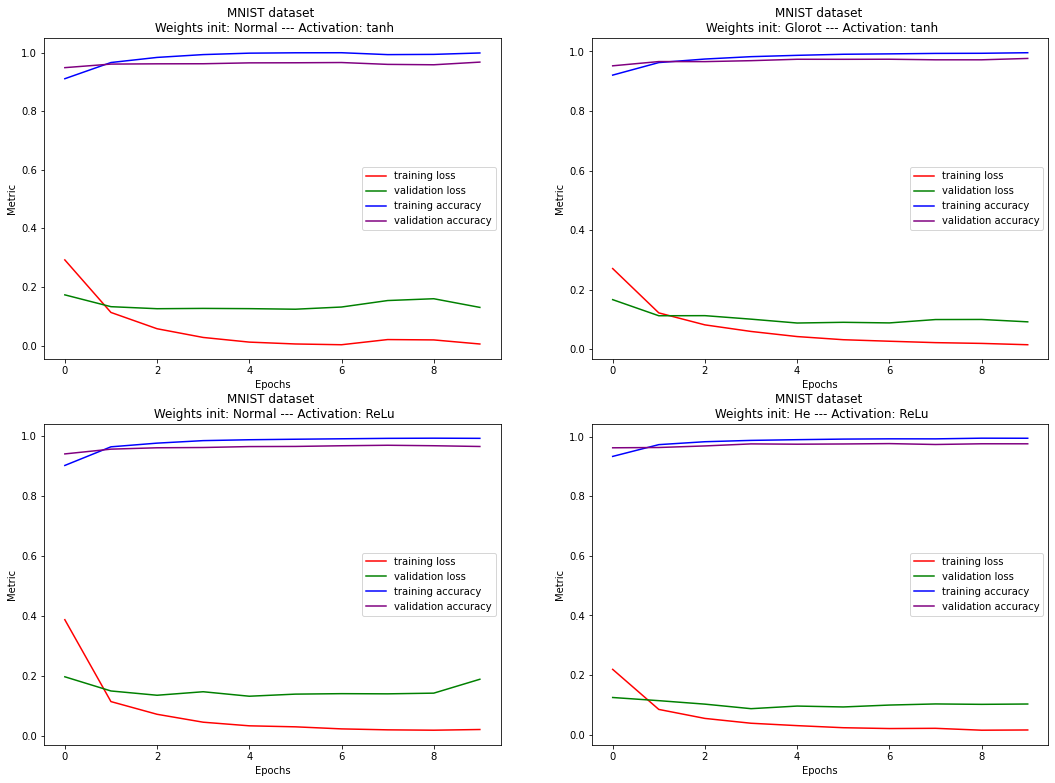

In [75]:
fig, axs = plt.subplots(2, 2, figsize = (18, 13))
i,j = 0,0
for hist in mnist_models_training_history_adam:
    axs[i][j].plot(range(EPOCHS), hist[0].history['loss'], 'r', label = 'training loss')
    axs[i][j].plot(range(EPOCHS), hist[0].history['val_loss'], 'g', label = 'validation loss')
    axs[i][j].plot(range(EPOCHS), hist[0].history['accuracy'], 'b', label = 'training accuracy')
    axs[i][j].plot(range(EPOCHS), hist[0].history['val_accuracy'], 'purple', label = 'validation accuracy')
    axs[i][j].set_title("MNIST dataset \n Weights init: %s --- Activation: %s" % (hist[2], hist[1]))
    axs[i][j].set_xlabel('Epochs')
    axs[i][j].set_ylabel('Metric')
    axs[i][j].legend()
    j+=1
    if j%2==0:
        i+=1
        j=0

### Animal faces

In [76]:
anim_models_training_history_adam = [
    (tanh_history_anim_classic_adam, 'tanh', 'Normal'),
    (tanh_history_anim_glorot_adam, 'tanh', 'Glorot'),
    (relu_history_anim_classic_adam, 'ReLu', 'Normal'),
    (relu_history_anim_he_adam, 'ReLu', 'He')
]

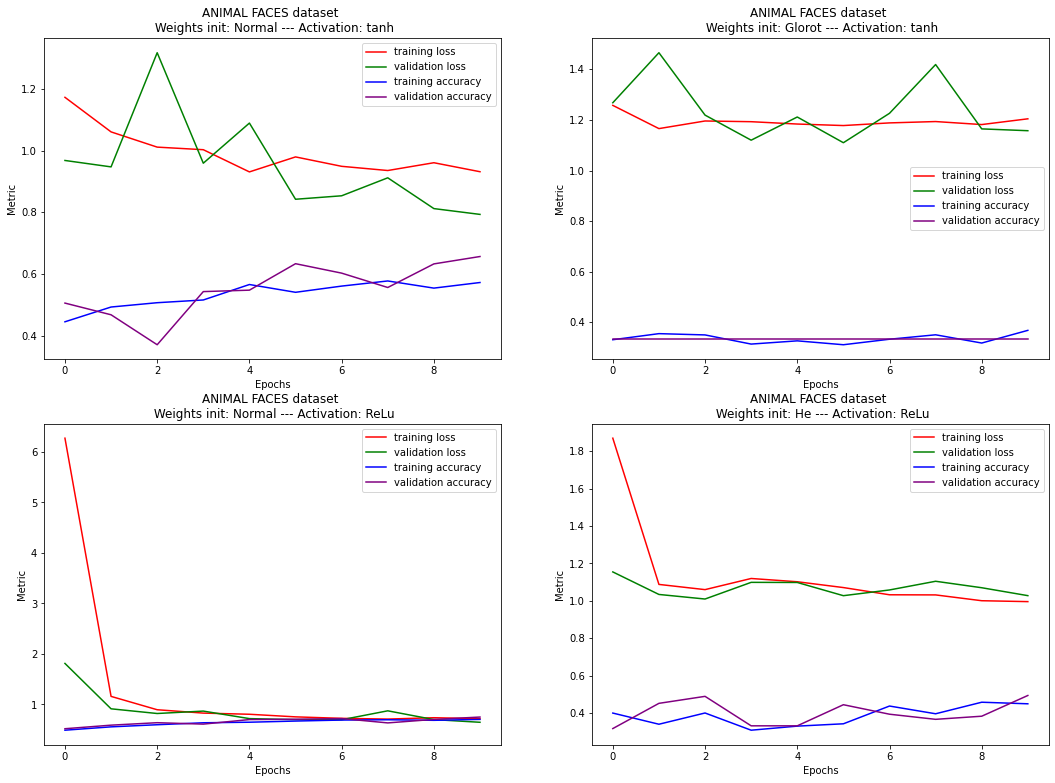

In [77]:
fig, axs = plt.subplots(2, 2, figsize = (18, 13))
i,j = 0,0
for hist in anim_models_training_history_adam:
    axs[i][j].plot(range(EPOCHS), hist[0].history['loss'], 'r', label = 'training loss')
    axs[i][j].plot(range(EPOCHS), hist[0].history['val_loss'], 'g', label = 'validation loss')
    axs[i][j].plot(range(EPOCHS), hist[0].history['accuracy'], 'b', label = 'training accuracy')
    axs[i][j].plot(range(EPOCHS), hist[0].history['val_accuracy'], 'purple', label = 'validation accuracy')
    axs[i][j].set_title("ANIMAL FACES dataset \n Weights init: %s --- Activation: %s" % (hist[2], hist[1]))
    axs[i][j].set_xlabel('Epochs')
    axs[i][j].set_ylabel('Metric')
    axs[i][j].legend()
    j+=1
    if j%2==0:
        i+=1
        j=0

## Accuracies for each model

### SGD

In [78]:
accuracy_df

MNIST  ANIM FACES
tanh_classic  88.47      61.600
tanh_glorot   89.43      71.667
relu_classic  93.37      59.267
relu_he       89.71      66.000

###  Adam

In [79]:
accuracy_df_adam

MNIST  ANIM FACES
tanh_classic  96.86      65.667
tanh_glorot   97.45      33.333
relu_classic  96.95      75.067
relu_he       97.61      49.533

### Colclusions:

#### On the MNIST dataset, all the models performed much better. 
#### The best model on the dataset with animal faces also gave the best result. 
#### However, there was a strong sensitivity to the initialization of the weights on the dataset with animals faces.

# For one of the networks, add mini-batch normalization before each layer.
###  !!! The study will be completed for the animal faces dataset.

$\cdot$ Check whether the network has become less sensitive to the weights initialization method

$\cdot$ Do the learning process of the network is accelerated after adding
normalization before each layer?

$\cdot$ Choose higher values of the learning rate. What can you say
about the model accuracy?

$\cdot$ Does the forecasting time decrease or increase with this network?


In [80]:
def build_model_norm(n_classes, input_shape, activation, weights_init = 'classic', lr=0.001):
    if weights_init == 'classic':
        kernel_initializer = keras.initializers.RandomNormal(mean = 0., stddev = 1.)
    elif weights_init == 'glorot':
        kernel_initializer = keras.initializers.GlorotNormal()
    elif weights_init == 'he':
        kernel_initializer = keras.initializers.HeNormal()
    else:
        raise Exception("Wrong initializer selected, please select classic, glorot or he option!")
    
    if activation not in ['relu', 'tanh']:
        raise Exception("Wrong activation fuction selected, please select relu or tanh!")
    
    model = keras.Sequential()
    model.add(keras.layers.Input(shape = input_shape))
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(512, kernel_initializer = kernel_initializer, activation = activation))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(256, activation = activation))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(n_classes, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy',
                optimizer = keras.optimizers.Adam(learning_rate = lr),
                metrics = ['accuracy', keras.metrics.AUC()])
    
    return model

## tanh activation

### Classic weights initialization

In [81]:
tanh_model_anim_classic_norm = build_model_norm(N_CLASSES_ANIM, INPUT_SHAPE_ANIM, 'tanh')
anim_model_time_test(tanh_model_anim_classic_norm, training_dataset, test_dataset)

Epoch 1/10
458/458 [==============================] - 63s 134ms/step - loss: 1.2283 - accuracy: 0.3363 - auc_32: 0.4978 - val_loss: 1.1075 - val_accuracy: 0.3340 - val_auc_32: 0.5103
Epoch 2/10
458/458 [==============================] - 61s 134ms/step - loss: 1.1091 - accuracy: 0.3297 - auc_32: 0.4962 - val_loss: 1.0977 - val_accuracy: 0.3487 - val_auc_32: 0.5245
Epoch 3/10
458/458 [==============================] - 63s 137ms/step - loss: 1.1011 - accuracy: 0.3369 - auc_32: 0.5031 - val_loss: 1.0981 - val_accuracy: 0.3567 - val_auc_32: 0.5181
Epoch 4/10
458/458 [==============================] - 64s 139ms/step - loss: 1.0997 - accuracy: 0.3408 - auc_32: 0.4992 - val_loss: 1.0976 - val_accuracy: 0.3387 - val_auc_32: 0.5228
Epoch 5/10
458/458 [==============================] - 58s 126ms/step - loss: 1.1005 - accuracy: 0.3237 - auc_32: 0.4888 - val_loss: 1.0998 - val_accuracy: 0.3367 - val_auc_32: 0.4964
Epoch 6/10
458/458 [==============================] - 59s 128ms/step - loss: 1.0999 -

### Glorot weights init

In [82]:
tanh_model_anim_glorot_norm = build_model_norm(N_CLASSES_ANIM, INPUT_SHAPE_ANIM, 'tanh', 'glorot')
anim_model_time_test(tanh_model_anim_glorot_norm, training_dataset, test_dataset)

Epoch 1/10
458/458 [==============================] - 66s 143ms/step - loss: 1.2876 - accuracy: 0.3327 - auc_33: 0.4976 - val_loss: 1.1087 - val_accuracy: 0.3553 - val_auc_33: 0.5109
Epoch 2/10
458/458 [==============================] - 63s 139ms/step - loss: 1.1069 - accuracy: 0.3462 - auc_33: 0.5093 - val_loss: 1.0997 - val_accuracy: 0.3407 - val_auc_33: 0.5173
Epoch 3/10
458/458 [==============================] - 65s 143ms/step - loss: 1.1058 - accuracy: 0.3165 - auc_33: 0.4799 - val_loss: 1.0993 - val_accuracy: 0.3300 - val_auc_33: 0.5072
Epoch 4/10
458/458 [==============================] - 63s 137ms/step - loss: 1.0999 - accuracy: 0.3604 - auc_33: 0.5155 - val_loss: 1.0981 - val_accuracy: 0.3420 - val_auc_33: 0.5157
Epoch 5/10
458/458 [==============================] - 55s 119ms/step - loss: 1.1016 - accuracy: 0.3171 - auc_33: 0.4874 - val_loss: 1.0983 - val_accuracy: 0.3493 - val_auc_33: 0.5126
Epoch 6/10
458/458 [==============================] - 55s 119ms/step - loss: 1.1013 -

## ReLu activation

### Classic weights initialization

In [83]:
relu_model_anim_classic_norm = build_model_norm(N_CLASSES_ANIM, INPUT_SHAPE_ANIM, 'relu')
anim_model_time_test(relu_model_anim_classic_norm, training_dataset, test_dataset)

Epoch 1/10
458/458 [==============================] - 65s 140ms/step - loss: 1.2360 - accuracy: 0.3336 - auc_34: 0.4971 - val_loss: 1.0980 - val_accuracy: 0.3540 - val_auc_34: 0.5265
Epoch 2/10
458/458 [==============================] - 59s 129ms/step - loss: 1.1064 - accuracy: 0.3268 - auc_34: 0.4891 - val_loss: 1.1007 - val_accuracy: 0.3293 - val_auc_34: 0.4983
Epoch 3/10
458/458 [==============================] - 57s 125ms/step - loss: 1.0979 - accuracy: 0.3711 - auc_34: 0.5241 - val_loss: 1.0904 - val_accuracy: 0.3780 - val_auc_34: 0.5790
Epoch 4/10
458/458 [==============================] - 59s 129ms/step - loss: 1.1005 - accuracy: 0.3341 - auc_34: 0.4929 - val_loss: 1.0981 - val_accuracy: 0.3380 - val_auc_34: 0.5118
Epoch 5/10
458/458 [==============================] - 57s 124ms/step - loss: 1.1008 - accuracy: 0.3145 - auc_34: 0.4780 - val_loss: 1.0983 - val_accuracy: 0.3393 - val_auc_34: 0.5124
Epoch 6/10
458/458 [==============================] - 62s 136ms/step - loss: 1.1004 -

### HE weights init

In [84]:
relu_model_anim_he_norm = build_model_norm(N_CLASSES_ANIM, INPUT_SHAPE_ANIM, 'relu', 'he')
anim_model_time_test(relu_model_anim_he_norm, training_dataset, test_dataset)

Epoch 1/10
458/458 [==============================] - 59s 127ms/step - loss: 1.2421 - accuracy: 0.3315 - auc_35: 0.4967 - val_loss: 1.1056 - val_accuracy: 0.3227 - val_auc_35: 0.4977
Epoch 2/10
458/458 [==============================] - 56s 122ms/step - loss: 1.1019 - accuracy: 0.3495 - auc_35: 0.5126 - val_loss: 1.0967 - val_accuracy: 0.3533 - val_auc_35: 0.5163
Epoch 3/10
458/458 [==============================] - 60s 130ms/step - loss: 1.1000 - accuracy: 0.3296 - auc_35: 0.5148 - val_loss: 1.1023 - val_accuracy: 0.3307 - val_auc_35: 0.4970
Epoch 4/10
458/458 [==============================] - 66s 145ms/step - loss: 1.0938 - accuracy: 0.3532 - auc_35: 0.5329 - val_loss: 1.1002 - val_accuracy: 0.3233 - val_auc_35: 0.5094
Epoch 5/10
458/458 [==============================] - 60s 131ms/step - loss: 1.1025 - accuracy: 0.3331 - auc_35: 0.4895 - val_loss: 1.1026 - val_accuracy: 0.2860 - val_auc_35: 0.4800
Epoch 6/10
458/458 [==============================] - 63s 137ms/step - loss: 1.1007 -

### higher lr

In [85]:
relu_model_anim_classic_norm = build_model_norm(N_CLASSES_ANIM, INPUT_SHAPE_ANIM, 'relu', lr = 0.1)
anim_model_time_test(relu_model_anim_classic_norm, training_dataset, test_dataset)

Epoch 1/10
458/458 [==============================] - 63s 134ms/step - loss: 2.3433 - accuracy: 0.3363 - auc_36: 0.4979 - val_loss: 1.2373 - val_accuracy: 0.3333 - val_auc_36: 0.4990
Epoch 2/10
458/458 [==============================] - 64s 140ms/step - loss: 1.5688 - accuracy: 0.3354 - auc_36: 0.4764 - val_loss: 1.6782 - val_accuracy: 0.3480 - val_auc_36: 0.4902
Epoch 3/10
458/458 [==============================] - 56s 123ms/step - loss: 1.3905 - accuracy: 0.3710 - auc_36: 0.5366 - val_loss: 4.0012 - val_accuracy: 0.3307 - val_auc_36: 0.5093
Epoch 4/10
458/458 [==============================] - 56s 122ms/step - loss: 1.7878 - accuracy: 0.3655 - auc_36: 0.5165 - val_loss: 74.1079 - val_accuracy: 0.3433 - val_auc_36: 0.5185
Epoch 5/10
458/458 [==============================] - 55s 119ms/step - loss: 1.6941 - accuracy: 0.2775 - auc_36: 0.4410 - val_loss: 53.7060 - val_accuracy: 0.3313 - val_auc_36: 0.5090
Epoch 6/10
458/458 [==============================] - 55s 119ms/step - loss: 2.0772

## Conclusions

- The learning speed has not changed significantly. 
- The speed of the prediction has not changed too.
- The sensitivity from the weight initialization method has decreased. All models have approximately the same accuracy result. 
- Model accuracy dropped as learning rate increased.

# Add one / more dropout layers to the models. Choose the value of the p-probability of neurons disconnection.

## parameters of the best models received previously will be user in the study: 
 - MNIST - adam, relu activation, he weights init, lr - 0.01
 - ANIM  - adam, relu activation, classic weights init, lr - 0.001
 
$\cdot$ Make conclusions on the accuracy of network learning with and without the use of dropout.

$\cdot$ How should the probability value p be changed if the network is overfitted?


In [86]:
def build_model_drop(n_classes, input_shape, activation, weights_init = 'classic', lr=0.001):
    if weights_init == 'classic':
        kernel_initializer = keras.initializers.RandomNormal(mean = 0., stddev = 1.)
    elif weights_init == 'glorot':
        kernel_initializer = keras.initializers.GlorotNormal()
    elif weights_init == 'he':
        kernel_initializer = keras.initializers.HeNormal()
    else:
        raise Exception("Wrong initializer selected, please select classic, glorot or he option!")
    
    if activation not in ['relu', 'tanh']:
        raise Exception("Wrong activation fuction selected, please select relu or tanh!")

    model = keras.Sequential()
    model.add(keras.layers.Input(shape = input_shape))
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(512, kernel_initializer = kernel_initializer, activation = activation))
    model.add(keras.layers.Dense(256, activation = activation))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(n_classes, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy',
                optimizer = keras.optimizers.Adam(learning_rate = lr),
                metrics = ['accuracy', keras.metrics.AUC()])
    
    return model

### MNIST

In [87]:
mnist_drop = build_model_drop(N_CLASSES_MNIST, INPUT_SHAPE_MNIST, 'relu', 'he', lr = 0.01)

mnist_history_drop = mnist_drop.fit(x_train,
                          y_train,
                          epochs = EPOCHS,
                          batch_size = 64,                                   
                          validation_split = 0.2,
                          verbose = False)

In [88]:
_, accuracy, auc = mnist_drop.evaluate(x_test, y_test, verbose = 0)

print(f'Test accuracy: {np.round(100 * accuracy, 3)}%')
print(f'Test AUC: {np.round(100 * auc, 3)}%')

Test accuracy: 96.67%
Test AUC: 99.565%


### Animal faces

In [89]:
anim_drop = build_model_adam(N_CLASSES_ANIM, INPUT_SHAPE_ANIM, 'relu')

anim_history_drop = anim_drop.fit(training_dataset,
                          epochs = EPOCHS,
                          batch_size = 64,                                   
                          validation_data = test_dataset,
                          verbose = True)

Epoch 1/10
458/458 [==============================] - 52s 113ms/step - loss: 12.6413 - accuracy: 0.4741 - auc_38: 0.6285 - val_loss: 1.9025 - val_accuracy: 0.4407 - val_auc_38: 0.6687
Epoch 2/10
458/458 [==============================] - 51s 111ms/step - loss: 1.1825 - accuracy: 0.5236 - auc_38: 0.7130 - val_loss: 0.8149 - val_accuracy: 0.6273 - val_auc_38: 0.8196
Epoch 3/10
458/458 [==============================] - 51s 112ms/step - loss: 0.9048 - accuracy: 0.5826 - auc_38: 0.7709 - val_loss: 0.7916 - val_accuracy: 0.6367 - val_auc_38: 0.8243
Epoch 4/10
458/458 [==============================] - 51s 111ms/step - loss: 0.8451 - accuracy: 0.6269 - auc_38: 0.8072 - val_loss: 0.9169 - val_accuracy: 0.5467 - val_auc_38: 0.7672
Epoch 5/10
458/458 [==============================] - 51s 112ms/step - loss: 0.8429 - accuracy: 0.6202 - auc_38: 0.8022 - val_loss: 0.7451 - val_accuracy: 0.6813 - val_auc_38: 0.8547
Epoch 6/10
458/458 [==============================] - 51s 112ms/step - loss: 0.7892 

In [90]:
_, accuracy, auc = anim_drop.evaluate(test_dataset, verbose = 0)

print(f'Test accuracy: {np.round(100 * accuracy, 3)}%')
print(f'Test AUC: {np.round(100 * auc, 3)}%')

Test accuracy: 62.067%
Test AUC: 78.652%


### Loss and accyracy curves

In [91]:
drop_model_histories = [
    (mnist_history_drop, 'MNIST'),
    (anim_history_drop, 'Animal faces')
]

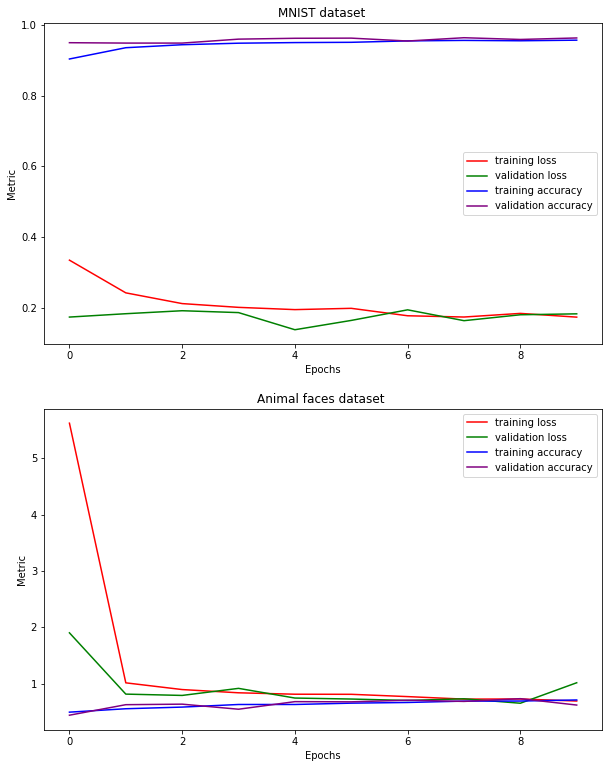

In [92]:
fig, axs = plt.subplots(2, figsize = (10, 13))
i,j = 0,0
for hist in drop_model_histories:
    axs[i].plot(range(EPOCHS), hist[0].history['loss'], 'r', label = 'training loss')
    axs[i].plot(range(EPOCHS), hist[0].history['val_loss'], 'g', label = 'validation loss')
    axs[i].plot(range(EPOCHS), hist[0].history['accuracy'], 'b', label = 'training accuracy')
    axs[i].plot(range(EPOCHS), hist[0].history['val_accuracy'], 'purple', label = 'validation accuracy')
    axs[i].set_title("%s dataset " % (hist[1]))
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel('Metric')
    axs[i].legend()
    i+=1

### Conclusions
 - if the network is overfitted - the p-probability should be increased
 - The accuracy of the models did not improve after adding the dropout layer.

# Implement another way of network regularization - early stopping.

In [93]:
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 1)

### MNIST

In [94]:
mnist_es = build_model_drop(N_CLASSES_MNIST, INPUT_SHAPE_MNIST, 'relu', 'he', lr = 0.01)

mnist_history_es = mnist_es.fit(x_train,
                          y_train,
                          epochs = EPOCHS,
                          batch_size = 64,                                   
                          validation_split = 0.2,
                          verbose = False,
                          callbacks = [callback])

In [95]:
_, accuracy, auc = mnist_es.evaluate(x_test, y_test, verbose = 0)

print(f'Test accuracy: {np.round(100 * accuracy, 3)}%')
print(f'Test AUC: {np.round(100 * auc, 3)}%')

Test accuracy: 95.38%
Test AUC: 99.506%


### Animal faces

In [96]:
anim_es = build_model_adam(N_CLASSES_ANIM, INPUT_SHAPE_ANIM, 'relu')

In [97]:
anim_es = build_model_adam(N_CLASSES_ANIM, INPUT_SHAPE_ANIM, 'relu')

anim_history_drop = anim_es.fit(training_dataset,
                          epochs = EPOCHS,
                          batch_size = 64,                                   
                          validation_data = test_dataset,
                          callbacks = [callback],
                          verbose = True)

Epoch 1/10
458/458 [==============================] - 52s 113ms/step - loss: 25.5886 - accuracy: 0.3991 - auc_41: 0.5665 - val_loss: 1.4110 - val_accuracy: 0.5133 - val_auc_41: 0.6981
Epoch 2/10
458/458 [==============================] - 57s 125ms/step - loss: 0.9884 - accuracy: 0.6027 - auc_41: 0.7753 - val_loss: 0.9138 - val_accuracy: 0.5827 - val_auc_41: 0.7624
Epoch 3/10
458/458 [==============================] - 60s 131ms/step - loss: 0.8732 - accuracy: 0.6133 - auc_41: 0.7911 - val_loss: 0.8924 - val_accuracy: 0.5947 - val_auc_41: 0.7783
Epoch 4/10
458/458 [==============================] - 57s 124ms/step - loss: 0.8421 - accuracy: 0.6190 - auc_41: 0.8013 - val_loss: 0.9899 - val_accuracy: 0.5873 - val_auc_41: 0.7782
Epoch 5/10
458/458 [==============================] - 58s 127ms/step - loss: 0.8311 - accuracy: 0.6321 - auc_41: 0.8092 - val_loss: 0.8966 - val_accuracy: 0.5933 - val_auc_41: 0.7926
Epoch 6/10
458/458 [==============================] - 59s 128ms/step - loss: 0.8112 

In [99]:
_, accuracy, auc = anim_es.evaluate(test_dataset, verbose = 0)

print(f'Test accuracy: {np.round(100 * accuracy, 3)}%')
print(f'Test AUC: {np.round(100 * auc, 3)}%')

Test accuracy: 65.867%
Test AUC: 84.904%


# Limit the weights of the network by applying regularization according to l1, l2 and max norms

In [100]:
def build_model_regu(n_classes, input_shape, activation, weights_init = 'classic', lr=0.001):
    if weights_init == 'classic':
        kernel_initializer = keras.initializers.RandomNormal(mean = 0., stddev = 1.)
    elif weights_init == 'glorot':
        kernel_initializer = keras.initializers.GlorotNormal()
    elif weights_init == 'he':
        kernel_initializer = keras.initializers.HeNormal()
    else:
        raise Exception("Wrong initializer selected, please select classic, glorot or he option!")
    
    if activation not in ['relu', 'tanh']:
        raise Exception("Wrong activation fuction selected, please select relu or tanh!")

    model = keras.Sequential()
    model.add(keras.layers.Input(shape = input_shape))
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512, kernel_initializer = kernel_initializer, kernel_regularizer = 'l1', activation = activation))
    model.add(keras.layers.Dense(256, activation = activation, kernel_regularizer = 'l2'))
    model.add(keras.layers.Dense(n_classes, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy',
                optimizer = keras.optimizers.Adam(learning_rate = lr),
                metrics = ['accuracy', keras.metrics.AUC()])
    
    return model

### MNIST

In [101]:
mnist_regu = build_model_regu(N_CLASSES_MNIST, INPUT_SHAPE_MNIST, 'relu', 'he', lr = 0.01)

mnist_history_drop = mnist_regu.fit(x_train,
                          y_train,
                          epochs = EPOCHS,
                          batch_size = 64,                                   
                          validation_split = 0.2,
                          verbose = False)

In [102]:
_, accuracy, auc = mnist_regu.evaluate(x_test, y_test, verbose = 0)

print(f'Test accuracy: {np.round(100 * accuracy, 3)}%')
print(f'Test AUC: {np.round(100 * auc, 3)}%')

Test accuracy: 83.06%
Test AUC: 98.301%


### Animal faces

In [103]:
anim_regu = build_model_regu(N_CLASSES_ANIM, INPUT_SHAPE_ANIM, 'relu')

anim_history_regu = anim_regu.fit(training_dataset,
                          epochs = EPOCHS,
                          batch_size = 64,                                   
                          validation_data = test_dataset,
                          verbose = True)

Epoch 1/10
458/458 [==============================] - 64s 139ms/step - loss: 44853.3112 - accuracy: 0.4337 - auc_43: 0.5879 - val_loss: 29441.1680 - val_accuracy: 0.5880 - val_auc_43: 0.7608
Epoch 2/10
458/458 [==============================] - 65s 142ms/step - loss: 25290.1362 - accuracy: 0.5361 - auc_43: 0.7102 - val_loss: 14769.8906 - val_accuracy: 0.4613 - val_auc_43: 0.6626
Epoch 3/10
458/458 [==============================] - 65s 142ms/step - loss: 12289.7065 - accuracy: 0.4920 - auc_43: 0.6870 - val_loss: 6387.8335 - val_accuracy: 0.5260 - val_auc_43: 0.7099
Epoch 4/10
458/458 [==============================] - 65s 141ms/step - loss: 5146.9974 - accuracy: 0.4873 - auc_43: 0.6823 - val_loss: 2366.9919 - val_accuracy: 0.5347 - val_auc_43: 0.7276
Epoch 5/10
458/458 [==============================] - 64s 140ms/step - loss: 1847.4943 - accuracy: 0.5327 - auc_43: 0.7148 - val_loss: 753.2637 - val_accuracy: 0.5333 - val_auc_43: 0.6734
Epoch 6/10
458/458 [==============================]

In [104]:
_, accuracy, auc = anim_regu.evaluate(test_dataset, verbose = 0)

print(f'Test accuracy: {np.round(100 * accuracy, 3)}%')
print(f'Test AUC: {np.round(100 * auc, 3)}%')

Test accuracy: 34.133%
Test AUC: 51.681%


# Best models, predict example

- MNIST - Trained with adam, ReLU activation, HE init weights
- ANIM FACES - Trained with adam, ReLu activation, Classic init weights

### MNIST

In [105]:
best_model_mnist = relu_model_mnist_he_adam

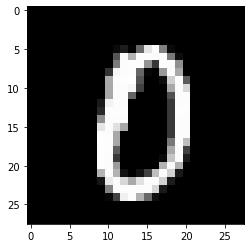

In [106]:
n = 55
image = x_test[n].reshape(28, 28)

plt.imshow(image, cmap = 'gray')
plt.show()

In [107]:
pred = best_model_mnist.predict(x_test)

print(f'predicted label: {np.where(np.round(pred[n]) == 1)[0][0]}')

predicted label: 0


### ANIM FACES

In [108]:
best_model_anim = relu_model_anim_classic_adam

(1, 64, 64, 3)
(64, 64, 3)


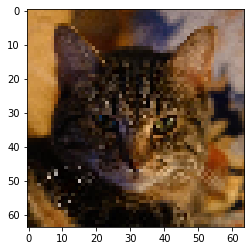

In [110]:
batch=next(test_dataset)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
image=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (image.shape)
plt.imshow(image)

In [111]:
pred_anim = best_model_anim.predict(test_dataset)
print(f'class indices: {test_dataset.class_indices}')
print(f'predicted label: {np.where(np.round(pred_anim[1]) == 1)[0][0]}')

class indices: {'cat': 0, 'dog': 1, 'wild': 2}
predicted label: 0
